In [1]:
# Author: Dr Simone Zaccaria
# Website: https://simozacca.github.io/
# Old affilliation: Princeton University, NJ (USA)
# New affilliation: UCL Cancer Institute, London (UK)
# Correspondence: s.zaccaria@ucl.ac.uk

%matplotlib inline
from lib import *

In [2]:
# Read the available data and compute basic statistics, including number of cells and ploidy

data, clones, iswgd = get_data()
cells = {d : set(e for g in data[d] for e in data[d][g] if e in clones[d]) for d in data}
data = {d : {g : {e : data[d][g][e] for e in data[d][g] if e in clones[d]} for g in data[d]} for d in data}
get_ploidy = (lambda D, e : sum(min(6, sum(D[g][e][0])) * float(g[2] - g[1]) for g in D) / float(sum(float(g[2] - g[1]) for g in D)))
ploidy = {d : {e : get_ploidy(data[d], e) for e in cells[d] if e in clones[d]} for d in data}
order = ['OS-8', 'OS-17', 'OS-11', 'OS-10', 'OS-4-tib', 'OS-7-tib', 'OS-7-flank', 'OS-113', 'OS-116', 'OS-114']

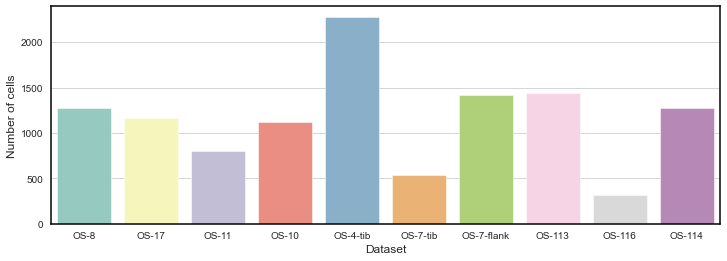

In [3]:
# Plotting numbers of cells

df = pd.DataFrame([{'Dataset' : d, 'Number of cells' : len(cells[d])} for d in cells])
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='Dataset', y='Number of cells', palette=sns.color_palette('Set3', len(order)), order=order, hue_order=order)
plt.savefig("number_of_cells.pdf", bbox_inches = 'tight')

No handles with labels found to put in legend.


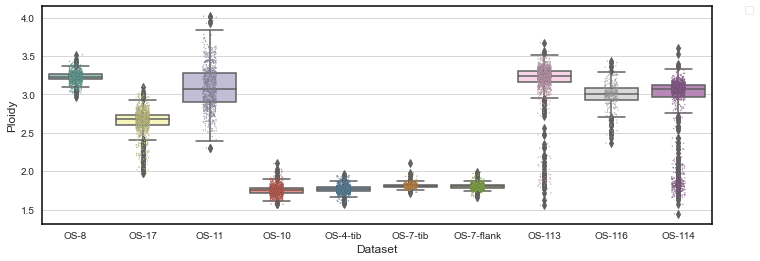

In [4]:
# Plotting distributions of cell ploidy

df = pd.DataFrame([{'Dataset' : d, 'Ploidy' : ploidy[d][e]} for d in cells for e in cells[d]])
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='Dataset', y='Ploidy',  palette='Set3', order=order, hue_order=order)
sns.stripplot(data=df, x='Dataset', y='Ploidy', palette='Set3', size=1, order=order, hue_order=order, edgecolor='black', linewidth=0.1)
plt.savefig("ploidy.pdf", bbox_inches = 'tight')

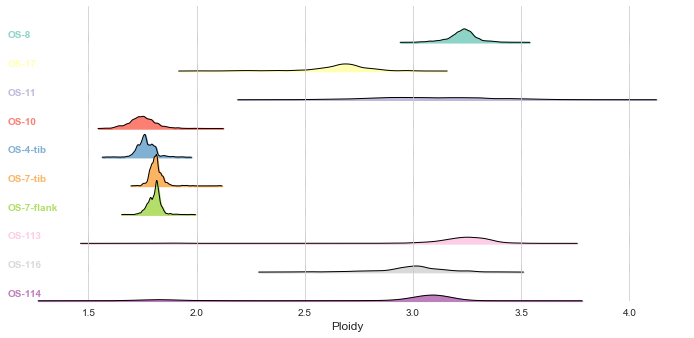

In [5]:
# Plotting kernel density estimates of Ploidy across datasets

plt.rcParams["axes.facecolor"] = (0, 0, 0, 0)
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
pal = sns.color_palette('Set3', len(order))
g = sns.FacetGrid(df, row="Dataset", hue="Dataset", aspect=20, height=.5, palette=pal, row_order=order, hue_order=order)
g.map(sns.kdeplot, "Ploidy",
      bw_adjust=.5, clip_on=False, common_norm=True, common_grid=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Ploidy", clip_on=False, color="k", lw=1, bw_adjust=.5, common_norm=True, common_grid=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Ploidy")
g.fig.subplots_adjust(hspace=-0.2)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig("ploidy_densities.pdf", bbox_inches = 'tight')

<Figure size 432x432 with 0 Axes>

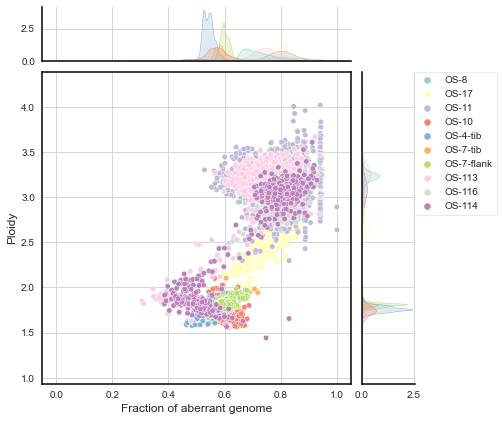

In [6]:
# Plotting Ploidy vs Fraction of aberrant genome per every single cell across different datasets

plt.rcParams["axes.facecolor"] = 'white'
aberr = (lambda d, D, e : sum(float(g[2] - g[1]) for g in D if D[g][e][0] not in {(1, 1), (2, 2)}) / sum(float(g[2] - g[1]) for g in D))
df = pd.DataFrame([{'Dataset' : d, 'Ploidy' : ploidy[d][e], 'Fraction of aberrant genome' : aberr(d, data[d], e)} for d in order for e in ploidy[d] if e in clones[d]])
plt.figure(figsize=(6, 6))
g = sns.jointplot(data=df, x='Fraction of aberrant genome', y='Ploidy', hue='Dataset', palette='Set3', hue_order=order, s=30, marginal_ticks=True)
g.ax_joint.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
g.ax_marg_x.set_xlim(-0.05, 1.05)
g.ax_joint.set_xlim(-0.05, 1.05)
sns.despine(ax=g.ax_joint, top=False, bottom=False, left=False, right=False)
plt.savefig("Figure2_panelA.pdf", bbox_inches = 'tight')

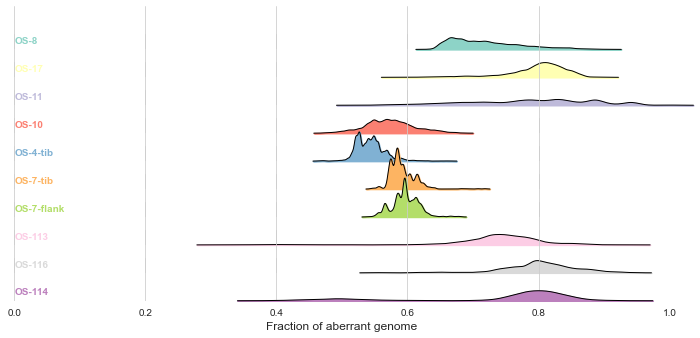

In [7]:
# Plotting kernel density estimates of Fraction of aberrant genome across datasets

plt.rcParams["axes.facecolor"] = (0, 0, 0, 0)
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
pal = sns.color_palette('Set3', len(order))
g = sns.FacetGrid(df, row="Dataset", hue="Dataset", aspect=20, height=.5, palette=pal, row_order=order, hue_order=order)
g.map(sns.kdeplot, "Fraction of aberrant genome",
      bw_adjust=.5, clip_on=False, common_norm=True, common_grid=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Fraction of aberrant genome", clip_on=False, color="k", lw=1, bw_adjust=.5, common_norm=True, common_grid=False)
plt.xlim(0, 1)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Fraction of aberrant genome")
g.fig.subplots_adjust(hspace=-0.35)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig("aberrant_densities.pdf", bbox_inches = 'tight')

<Figure size 432x432 with 0 Axes>

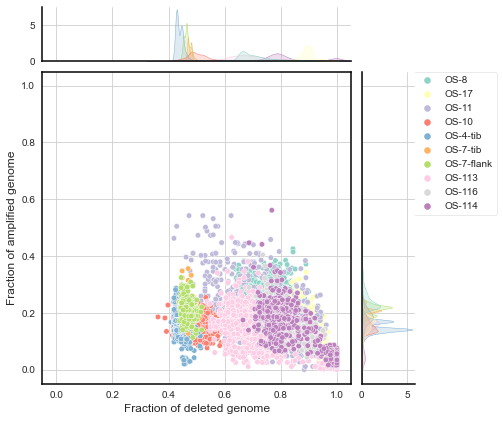

In [8]:
# Plotting Fraction of amplified genome vs Fraction of deleted genome per every single cell across different datasets

plt.rcParams["axes.facecolor"] = 'white'
isdel = (lambda h, d : (h[0] < 2 or h[1] < 2) if iswgd[d] else (h[0] < 1 or h[1] < 1))
isamp = (lambda h, d : (h[0] > 2 or h[1] > 2) if iswgd[d] else (h[0] > 1 or h[1] > 1))
fracg = (lambda d, e, f : sum(float(g[2] - g[1]) for g in data[d] if f(data[d][g][e][0], d)) / sum(float(g[2] - g[1]) for g in data[d]))
df = pd.DataFrame([{'Dataset' : d, 'Fraction of deleted genome' : fracg(d, e, isdel), 'Fraction of amplified genome' : fracg(d, e, isamp)} for d in order for e in cells[d]])
plt.figure(figsize=(6, 6))
g = sns.jointplot(data=df, x='Fraction of deleted genome', y='Fraction of amplified genome', hue='Dataset', palette='Set3', hue_order=order, s=30, marginal_ticks=True)
g.ax_joint.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
g.ax_joint.set_xlim(-0.05, 1.05)
g.ax_joint.set_ylim(-0.05, 1.05)
sns.despine(ax=g.ax_joint, top=False, bottom=False, left=False, right=False)
plt.savefig("Figure2_panelB.pdf", bbox_inches = 'tight')

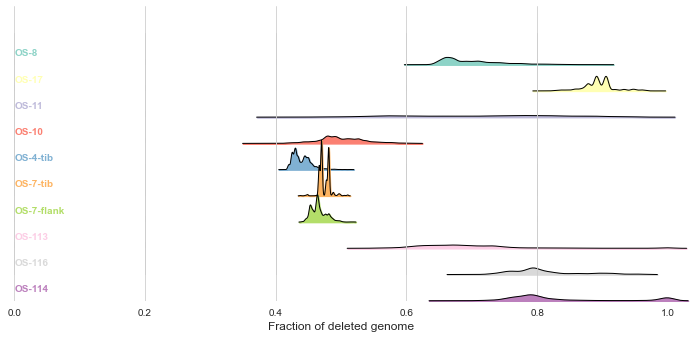

In [9]:
# Plotting kernel density estimates of Fraction of deleted genome across datasets

plt.rcParams["axes.facecolor"] = (0, 0, 0, 0)
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
pal = sns.color_palette('Set3', len(order))
g = sns.FacetGrid(df, row="Dataset", hue="Dataset", aspect=20, height=.5, palette=pal, row_order=order, hue_order=order)
g.map(sns.kdeplot, "Fraction of deleted genome",
      bw_adjust=.5, clip_on=False, common_norm=True, common_grid=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Fraction of deleted genome", clip_on=False, color="k", lw=1, bw_adjust=.5, common_norm=True, common_grid=False)
plt.xlim(0, 1)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Fraction of deleted genome")
g.fig.subplots_adjust(hspace=-0.55)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig("deleted_densities.pdf", bbox_inches = 'tight')

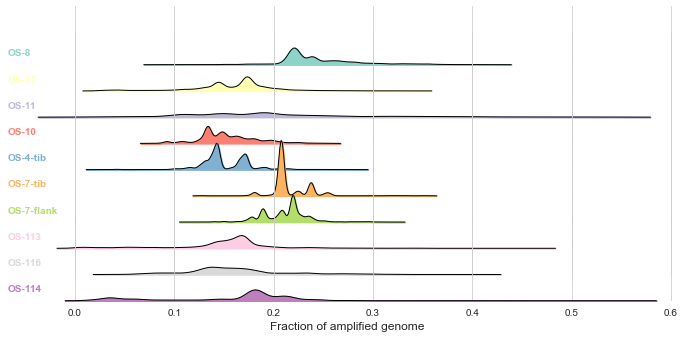

In [10]:
# Plotting kernel density estimates of Fraction of amplified genome across datasets

plt.rcParams["axes.facecolor"] = (0, 0, 0, 0)
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
pal = sns.color_palette('Set3', len(order))
g = sns.FacetGrid(df, row="Dataset", hue="Dataset", aspect=20, height=.5, palette=pal, row_order=order, hue_order=order)
g.map(sns.kdeplot, "Fraction of amplified genome",
      bw_adjust=.5, clip_on=False, common_norm=True, common_grid=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Fraction of amplified genome", clip_on=False, color="k", lw=1, bw_adjust=.5, common_norm=True, common_grid=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Fraction of amplified genome")
g.fig.subplots_adjust(hspace=-0.55)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig("amplified_densities.pdf", bbox_inches = 'tight')

<Figure size 432x432 with 0 Axes>

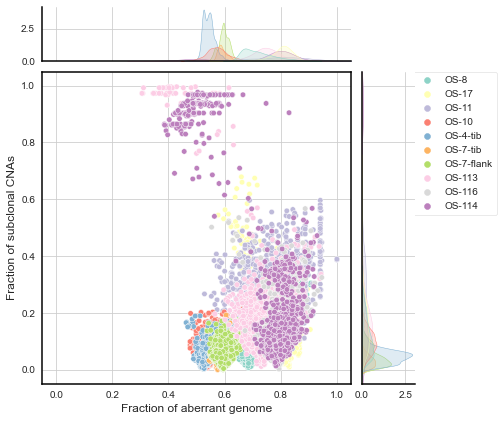

In [11]:
# Plotting Fraction of subclonal CNAs vs Fraction of aberrant genome per every single cell across different datasets

plt.rcParams["axes.facecolor"] = 'white'
argmax = (lambda D : max(D.keys(), key=(lambda x : D[x])))
major = {d : {g : argmax(Counter(data[d][g][e][0] for e in cells[d])) for g in data[d]} for d in data}
subcn = (lambda d, D, e : sum(float(g[2] - g[1]) for g in D if set(D[g][e][0]) != set(major[d][g])) / sum(float(g[2] - g[1]) for g in D))
aberr = (lambda d, D, e : sum(float(g[2] - g[1]) for g in D if D[g][e][0] not in {(1, 1), (2, 2)}) / sum(float(g[2] - g[1]) for g in D))
df = pd.DataFrame([{'Dataset' : d, 'Fraction of subclonal CNAs' : subcn(d, data[d], e), 'Fraction of aberrant genome' : aberr(d, data[d], e)} for d in order for e in cells[d]])
plt.figure(figsize=(6, 6))
g = sns.jointplot(data=df, x='Fraction of aberrant genome', y='Fraction of subclonal CNAs', hue='Dataset', palette='Set3', hue_order=order, s=30, marginal_ticks=True)
g.ax_joint.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
g.ax_marg_x.set_xlim(-0.05, 1.05)
g.ax_marg_y.set_ylim(-0.05, 1.05)
sns.despine(ax=g.ax_joint, top=False, bottom=False, left=False, right=False)
plt.savefig("Figure2_panelC.pdf", bbox_inches = 'tight')

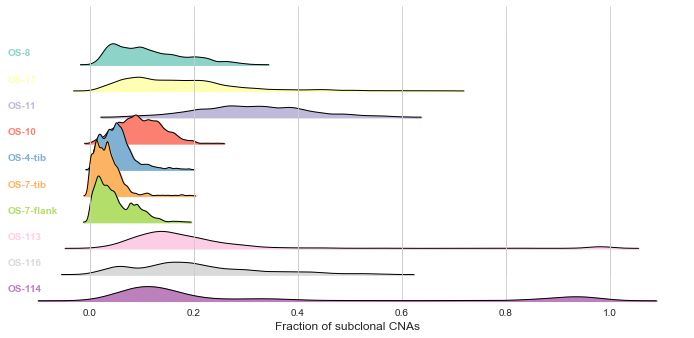

In [12]:
# Plotting kernel density estimates of Fraction of subclonal CNAs across datasets

plt.rcParams["axes.facecolor"] = (0, 0, 0, 0)
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
pal = sns.color_palette('Set3', len(order))
g = sns.FacetGrid(df, row="Dataset", hue="Dataset", aspect=20, height=.5, palette=pal, row_order=order, hue_order=order)
g.map(sns.kdeplot, "Fraction of subclonal CNAs",
      bw_adjust=.5, clip_on=False, common_norm=True, common_grid=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Fraction of subclonal CNAs", clip_on=False, color="k", lw=1, bw_adjust=.5, common_norm=True, common_grid=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Fraction of subclonal CNAs")
g.fig.subplots_adjust(hspace=-0.55)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig("subclonal_densities.pdf", bbox_inches = 'tight')

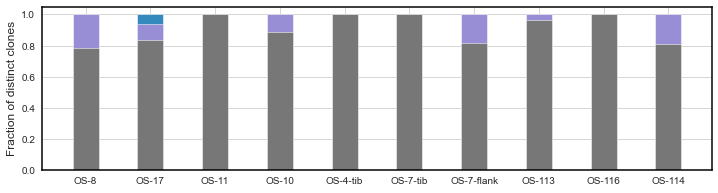

In [13]:
# Plotting clone proportions across different datasets

norm = (lambda L : list(map(lambda v : v / sum(L), L)))
counts = {c : norm(list(Counter(clones[c].values()).values())) for c in clones}
fig, ax = plt.subplots(figsize=(12, 3))
ax.bar(order, list(map(lambda i : counts[i][3] + sum(counts[i][:3]) if len(counts[i]) > 3 else 0 , order)), list(map(lambda v : 0.4, counts)))
ax.bar(order, list(map(lambda i : counts[i][2] + sum(counts[i][:2]) if len(counts[i]) > 2 else 0 , order)), list(map(lambda v : 0.4, counts)))
ax.bar(order, list(map(lambda i : counts[i][1] + counts[i][0] if len(counts[i]) > 1 else 0 , order)), list(map(lambda v : 0.4, counts)))
ax.bar(order, list(map(lambda i : counts[i][0], order)), list(map(lambda v : 0.4, counts)))
ax.set_ylabel('Fraction of distinct clones')
plt.savefig("clone_fractions.pdf", bbox_inches = 'tight')

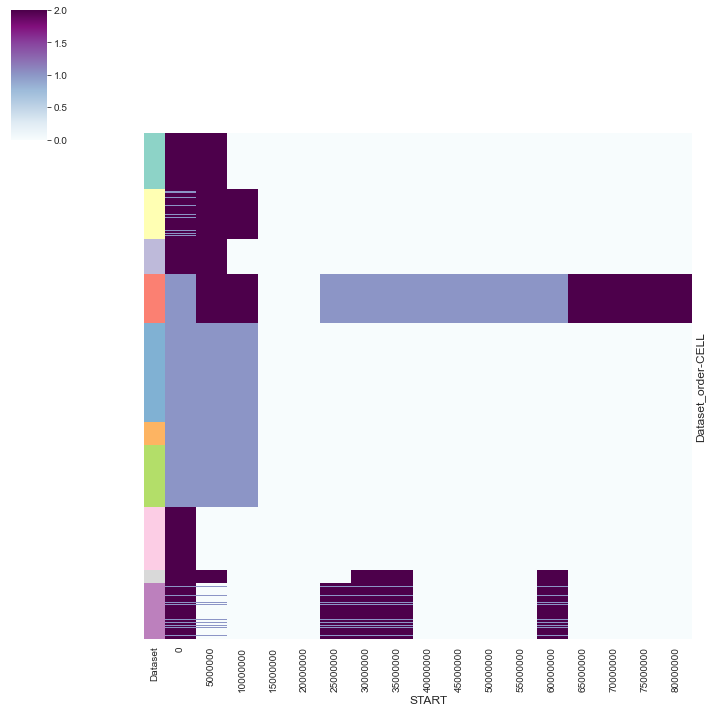

In [14]:
# Plotting LOH status of TP53 across every single cell in all datsets

TP53 = ('chr17', 7565097, 7687538)
form = (lambda d, g, c, x : {'DATASET' : d, 'START' : g[1], 'END' : g[2], 'CELL' : c, 'COPY NUMBERS' : x[0], 'CORRECTED' : x[1], 'LOH' : 0 if 0 not in x[1] else (1 if 1 in x[1] else 2)})
tp53data = pd.DataFrame([form(d, g, c, data[d][g][c]) for d in data for g in data[d] if g[0] in ['chr17', '17'] for c in data[d][g]])
tp53data['Dataset_order'] = tp53data['DATASET'].map({e : i for i, e in enumerate(order)})
datacol = tp53data[['DATASET', 'Dataset_order', 'CELL']].copy().drop_duplicates()
datacol['Dataset'] = datacol['DATASET'].map(dict(zip(order, sns.color_palette('Set3', len(order)))))
datacol = datacol.set_index(['Dataset_order','CELL'])['Dataset']
table = pd.pivot_table(tp53data, index=['Dataset_order', 'CELL'], columns='START', values='LOH')
sns.clustermap(table,
               row_cluster=False,
               col_cluster=False,
               cmap='BuPu',
               row_colors=datacol,
               yticklabels=False)
plt.savefig("tp53.pdf", bbox_inches = 'tight')